In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
rfm = pd.read_csv('/Users/shreyababare/Downloads/rfm_analysis_results.csv')
rfm.head()

,Account No,Recency,Frequency,Monetary,R,F,M,RFM Segment,RFM Score
0,100100738.0,8,128,8700.91,1,1,1,111,3
1,100837224.0,5,99,6739.93,2,1,1,211,4
2,101348775.0,1,434,18226.22,4,4,2,442,10
3,103439190.0,1,536,18886.59,4,4,2,442,10
4,104009728.0,1,433,27773.90,4,4,4,444,12


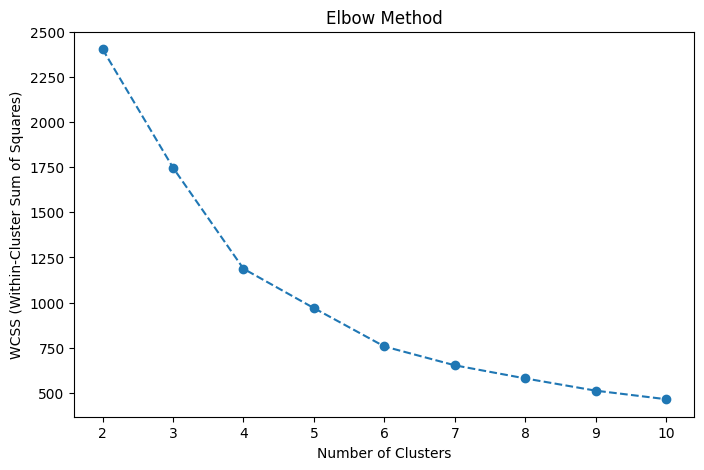

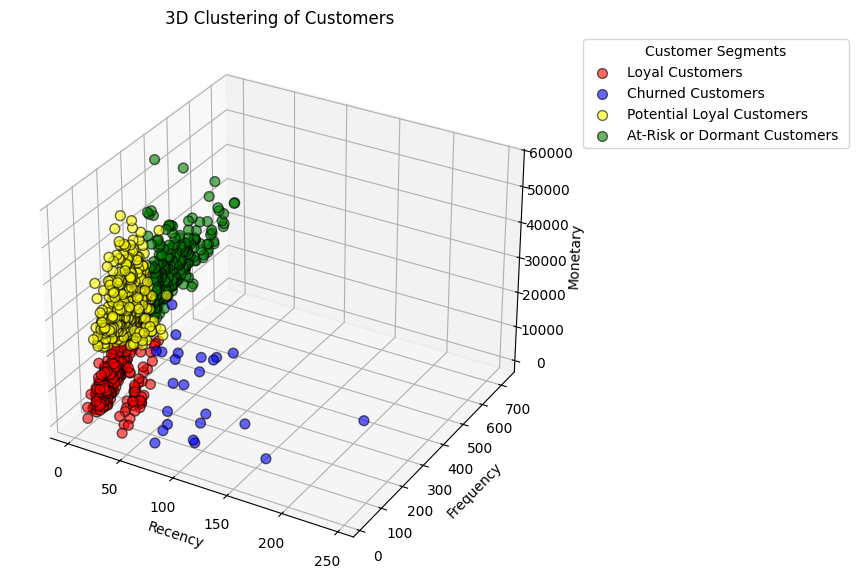

,Account No,Recency,Frequency,Monetary,R,F,M,RFM Segment,RFM Score,Cluster,Segment
0,100100738.0,8,128,8700.91,1,1,1,111,3,0,Loyal Customers
1,100837224.0,5,99,6739.93,2,1,1,211,4,0,Loyal Customers
2,101348775.0,1,434,18226.22,4,4,2,442,10,3,At-Risk or Dormant Customers
3,103439190.0,1,536,18886.59,4,4,2,442,10,3,At-Risk or Dormant Customers
4,104009728.0,1,433,27773.90,4,4,4,444,12,3,At-Risk or Dormant Customers


In [6]:
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']].copy()

# Normalize the data using StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

wcss = []
for i in range(2, 11): 
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Elbow Curve to determine optimal K
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Define cluster labels based on customer behavior
cluster_labels = {
    0: "Loyal Customers ",
    1: "Churned Customers ",
    2: "Potential Loyal Customers ",
    3: "At-Risk or Dormant Customers "
}
rfm['Segment'] = rfm['Cluster'].map(cluster_labels)

# 3D Scatter Plot to visualize clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each cluster
colors = ['red', 'blue', 'yellow', 'green']
for cluster in range(optimal_k):
    cluster_data = rfm[rfm['Cluster'] == cluster]
    ax.scatter(cluster_data['Recency'], cluster_data['Frequency'], cluster_data['Monetary'],
               label=cluster_labels[cluster], c=colors[cluster], s=50, alpha=0.6, edgecolors='k')

ax.set_xlabel('Recency') #(Days Since Last Transaction)
ax.set_ylabel('Frequency') # (Number of Transactions)
ax.set_zlabel('Monetary') #(Total Spend)
ax.set_title('3D Clustering of Customers')

ax.legend(title="Customer Segments", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Display first few rows
rfm.head()
